In [1]:
%matplotlib inline
import io
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

In [9]:
datafiles = [
             '../data/MTurk_anonymous.xlsx',
             '../data/DTU1_anonymous.xlsx',
             '../data/DTU2_anonymous.xlsx',
]

In [22]:
df_AMT = pd.DataFrame(pd.read_excel(datafiles[0]))
df_AMT['exp'] = 'AMT'
df_DTU1 = pd.DataFrame(pd.read_excel(datafiles[1]))
df_DTU1['exp'] = 'DTU1'
df_DTU2 = pd.DataFrame(pd.read_excel(datafiles[2]))
df_DTU2['exp'] = 'DTU2'
df = df_AMT
df = df.append(df_DTU1, ignore_index=True)
df = df.append(df_DTU2, ignore_index=True)


In [23]:
df

,Unnamed: 0,session,code,group,id_in_group,round,arrival,choice,certainty,bonus,strategy,simple,cutoff,fault,payoff,exp
0,0,0c0pdasz,zh74wr23,2,1,1,8.2,1,0.875,-0.13,NaN,NaN,NaN,NaN,7.89,AMT
1,1,0c0pdasz,w73mxa5y,2,2,1,8.3,1,0.875,-0.13,NaN,NaN,NaN,NaN,4.66,AMT
2,2,0c0pdasz,zh74wr23,2,1,2,8.2,0,0.500,-1.39,NaN,NaN,NaN,NaN,7.89,AMT
3,3,0c0pdasz,w73mxa5y,2,2,2,8.1,1,0.875,-4.16,NaN,NaN,NaN,NaN,4.66,AMT
4,4,0c0pdasz,zh74wr23,2,1,3,8.2,1,0.990,-0.01,NaN,NaN,NaN,NaN,7.89,AMT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1057,px95dqer,jghl3ft6,27,2,28,8.3,1,0.990,-0.01,NaN,NaN,NaN,NaN,0.00,DTU2
7428,1058,px95dqer,fihx7944,27,1,29,9.0,0,0.750,-2.77,NaN,NaN,NaN,NaN,1.67,DTU2
7429,1059,px95dqer,jghl3ft6,27,2,29,8.5,1,0.990,-9.21,NaN,NaN,NaN,NaN,0.00,DTU2
7430,1060,px95dqer,fihx7944,27,1,30,9.0,0,0.750,-2.77,Only choosing office if I arrived at 9:00 or 9:10,1.0,6.0,3.0,1.67,DTU2


In [24]:
df = df[['exp', 'code', 'arrival', 'choice']]
df.tail()

,exp,code,arrival,choice
7427,DTU2,jghl3ft6,8.3,1
7428,DTU2,fihx7944,9.0,0
7429,DTU2,jghl3ft6,8.5,1
7430,DTU2,fihx7944,9.0,0
7431,DTU2,jghl3ft6,8.5,1


Replace arrival times so that they are equidistant numbers and counted in minutes from 8am:

In [25]:
df['arrival'].replace({9.0: 8.6, 9.1: 8.7}, inplace=True)
df['arrival'] = df['arrival'] - 8
df['arrival'] = df['arrival'] * 100
df.tail()

C:\Users\hjl161\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-25-e6c17fde863b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival'] = df['arrival'] - 8
<ipython-input-25-e6c17fde863b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,exp,code,arrival,choice
7427,DTU2,jghl3ft6,30.0,1
7428,DTU2,fihx7944,60.0,0
7429,DTU2,jghl3ft6,50.0,1
7430,DTU2,fihx7944,60.0,0
7431,DTU2,jghl3ft6,50.0,1


The logistic regression takes longer time with confidence intervals due to the bootstrapping. Set n_boot to 10000 for the final plot.

In [27]:
from pymer4.models import Lmer

model = Lmer("choice  ~ arrival  + (1|code)", data=df, family = 'binomial')
print(model.fit())

R[write to console]: Error in (function (formula, data = NULL, family = gaussian, control = glmerControl(),  : 
  unused argument (REML = TRUE)



RRuntimeError: Error in (function (formula, data = NULL, family = gaussian, control = glmerControl(),  : 
  unused argument (REML = TRUE)


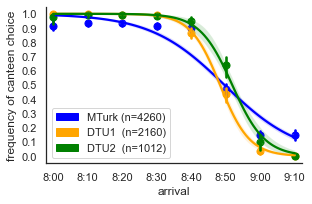

In [8]:
pal = dict(dfm="blue", dfd1="orange", dfd2="green")
g = sns.lmplot(x="arrival", y="choice", hue="group", data=df, palette=pal, 
               logistic=True, ci=95, n_boot=100, x_estimator=np.mean, x_ci="ci",
               y_jitter=.2, legend=False, height=3, aspect=1.5)

#plt.setp(g.lines, alpha=1) # setting translucency of CI to zero
g.set(xlim=(-2, 72))
g.set(ylabel='frequency of canteen choice')
g.set(xticks=[0,10,20,30,40,50,60,70], yticks=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9, 1])
g.set(xticklabels = ["8:00", "8:10", "8:20", "8:30", "8:40", "8:50", "9:00", "9:10"])

# make my own legend:
name_to_color = {
    'MTurk (n=4260)': 'blue',
    'DTU1  (n=2160)': 'orange',
    'DTU2  (n=1012)': 'green',
}
patches = [patch.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, loc='lower left')
plt.tight_layout()

plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig1_logit.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'fig1_logit.pdf'), transparent=True, dpi=300)
sns.despine()

In [ ]:
from pymer4.models import Lmer

model = Lmer("choice  ~ Age  + (1|Pclass)",
             data=titanic, family = 'binomial')

print(model.fit())